In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Define Help Functions

In [56]:
# euclidean distance
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2)) 

# clustering center initialization
def random_centroids(dataset,k):
    m = dataset.shape[0]
    index = random.sample(list(dataset.index), k)
    centroids = dataset.iloc[index,:].reset_index(drop = True)
    return centroids

# Define K-Means

In [74]:
def KMeans(dataset, k, iteration = 20):

    m = np.shape(dataset)[0]
    cluster_distance = np.mat(np.zeros((m,2)))
    iter = 1

    # step 1: initialize centroids
    centroids = random_centroids(dataset,k)
    while iter <= iteration:
        #cluster_change = False
        print(iter, centroids)
        for sample in range(m):
            #set a big enough distance
            min_dist = 100000.0
            min_index = -1

            #step 2: find the closest centroid
            for centroid_num in range(k):
                distance = euclidean_distance(centroids.iloc[centroid_num,:],dataset.iloc[sample,:])
                if distance < min_dist:
                    min_dist = distance
                    min_index = centroid_num
                    
            # step 3: update cluster distance matrix
            if cluster_distance[sample ,0] != min_index: #
                cluster_change = True
            cluster_distance[sample, :] = min_index, min_dist**2
                
        #step 4: update centroids
        for cluster_num in range(k):
            #get all the samples in the same cluster
            samples_in_cluster = dataset.iloc[np.nonzero(cluster_distance[:,0].A == cluster_num)[0],:]
            #if centroids are at the centers of clusters, end loop
            if list(centroids.iloc[cluster_num,:]) == list(np.mean(samples_in_cluster, axis=0)):
                print('Get best clusters in iteration ' + str(iter) + ', end clustering.')
                return centroids, cluster_distance
            #calculate new centroid -- using clusters' avg
            centroids.iloc[cluster_num,:] = np.mean(samples_in_cluster, axis=0) 
        iter += 1
        
    print("Clustering complete!")
    return centroids, cluster_distance

In [98]:
def show_cluster(dataset, k, centroids, cluster_distance):
    m,n = dataset.shape
    if n != 2:
        print("Not two dimensional data")
        return 1

    #set marks for 10 clusters
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Number of clusters bigger than the max number set")
        return 1

    # plot samples
    for i in range(m):
        markIndex = int(cluster_distance[i,0])
        plt.plot(dataset.iloc[i,0],dataset.iloc[i,1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    
    # plot centroids
    for i in range(k):
        plt.plot(centroids.iloc[i,0],centroids.iloc[i,1],mark[i])

    plt.show()


1    density   sugar
0    0.243  0.0267
1    0.697  0.4600
2    0.593  0.0420
2    density     sugar
0   0.3085  0.104925
1   0.6146  0.357600
2   0.5935  0.146250
Get best clusters in iteration 2, end clustering.


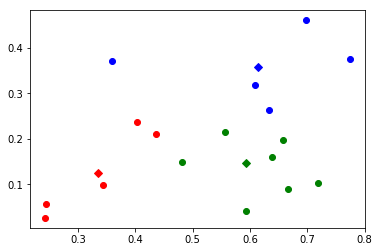

In [99]:
data = pd.read_csv('watermelon.csv')
data = data[[column for column in data.columns if column not in ['label', 'num']]]
#set k, max iterations
k = 3
iteration = 10
centroids, cluster_distance = KMeans(data, k, iteration)
show_cluster(data, k, centroids, cluster_distance)